# Statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [50]:
early = pd.read_json('../data/early_access.json').transpose().dropna(how = 'any').apply(pd.to_numeric, errors='ignore')
ex_early = pd.read_json('../data/ex_early_access.json').transpose().dropna(how = 'any').apply(pd.to_numeric, errors='ignore')
games = pd.read_json('../data/all_games.json').transpose().dropna(how = 'any').apply(pd.to_numeric, errors='ignore')

In [66]:
early['userscore'] = early['positive'] / (early['negative'] + early['positive']) * 100
ex_early['userscore'] = ex_early['positive'] / (ex_early['negative'] + ex_early['positive']) * 100
games['userscore'] = games['positive'] / (games['negative'] + games['positive']) * 100

In [67]:
early['status'] = 'early access'
ex_early['status'] = 'ex early access'
games['status'] = 'full release'

games = games.append(early)
games = games.append(ex_early)

games.drop_duplicates(['appid'], keep = 'last', inplace = True)

games.head()

,appid,average_2weeks,average_forever,developer,median_2weeks,median_forever,name,negative,owners,owners_variance,players_2weeks,players_2weeks_variance,players_forever,players_forever_variance,positive,price,publisher,score_rank,userscore,status
10,10,577,11400,Valve,65,402,Counter-Strike,2268,14193624,114203,451059,20654,9939125,95998,101728,999,Valve,97.0,97.819147,full release
100,100,166,194,Valve,16,33,Counter-Strike: Condition Zero,1015,11558779,103348,26969,5052,2080610,44285,9159,999,Valve,74.0,90.023590,full release
10000,10000,0,908,,0,291,Enemy Territory: Quake Wars,0,27217,5075,0,0,15340,3810,0,0,,NaN,NaN,full release
1002,1002,0,46,Mark Healey,0,16,Rag Doll Kung Fu,18,38599,6044,0,0,11876,3353,38,999,Mark Healey,24.0,67.857143,full release
100400,100400,1197,3433,Nevercenter Ltd. Co.,1197,706,Silo 2,15,6433,2467,747,1463,5196,2217,43,9999,Nevercenter Ltd. Co.,34.0,74.137931,full release


## What kind of data do we have?

How many games do we have?

In [59]:
grouped = games.groupby('status')
grouped['appid'].count()

status
early access        1404
ex early access     1133
full release       13207
Name: appid, dtype: int64

Average UserScore Comparison

status
early access       72.696570
ex early access    73.299788
full release       73.056467
Name: userscore, dtype: float64


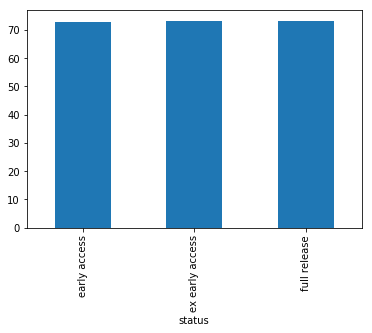

In [70]:
print grouped['userscore'].mean()
grouped['userscore'].mean().plot(kind= 'bar')

Average Price Comparison

In [69]:
print 'Games in Early Access: $', early['price'].mean() /100
print 'Games no longer in Early Access: $', ex_early['price'].mean() /100
print 'All games: $', games['price'].mean() /100

Games in Early Access: $ 8.86576502732
Games no longer in Early Access: $ 9.54513680494
All games: $ 7.9925679624


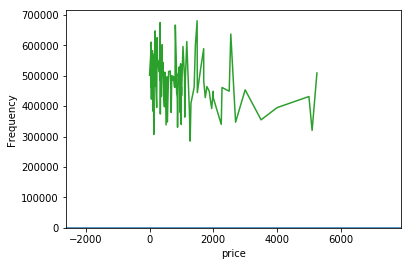

In [8]:
early.price.plot(kind = 'kde')
early.price.plot(kind = 'hist', normed = True)

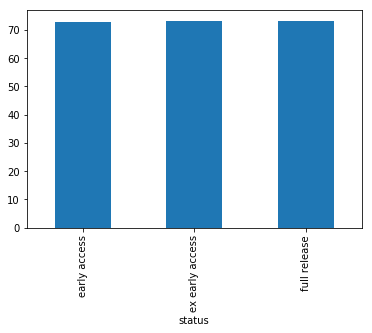

In [68]:
grouped = games.groupby('status')
grouped['userscore'].mean().plot( kind = 'bar')

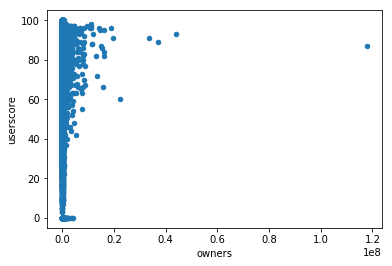

In [66]:
games.plot(kind = 'scatter', x = 'owners', y = 'userscore')

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.strings.StringAccessorMixin, pandas.core.generic.NDFrame)
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, dict, or scalar value
 |      Contains data stored in Series
 |  index : array-like or Index (1d)
 |      Values must be hashable and have the same lengt

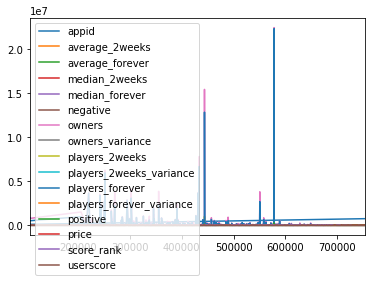

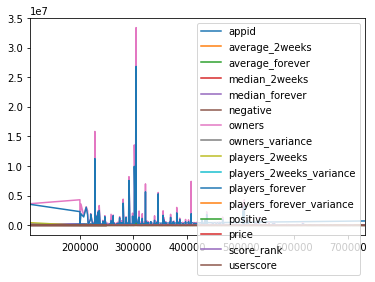

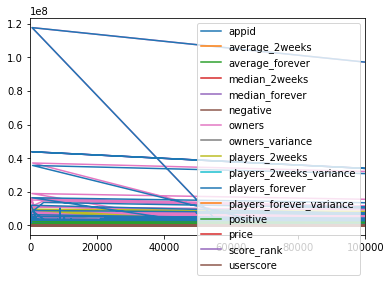

In [58]:
help(grouped.plot())